<a href="https://colab.research.google.com/github/sayarghoshroy/Optimization_and_Learning/blob/master/Optimization_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Optimization and Learning*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## *Problem 1*

$We\ consider\ the\ following\ linear\ regression\ function:$
$y = 2x_1 + 3x_2$

$We\ sample\ y(s)\ of\ the\ form\ y^i\ =\ 2x_1^i + 3x_2^i + \epsilon$

$Here; \epsilon ∼ \mathcal{N}(0, 0.01)$

$We\ generate\ 400\ samples\ (x_1^i, x_2^i)\ uniformly\ from\ [−4, 4]^2\ with\ their\ corresponding\ y^i values.$

In [0]:
# Data Creation
N_samples = 400
x_1 = np.random.uniform(low=-4.0, high=4.0, size=N_samples)
x_2 = np.random.uniform(low=-4.0, high=4.0, size=N_samples)
noise = np.random.normal(0, 0.01, N_samples)
y = 2 * x_1 + 3 * x_2 + noise

$let\ y' = a.x_1 + b.x_2$

$J\enspace = ||y' - y||_2$

$\quad\ = (y'-y)^T(y'-y)$

$\quad\ = (y'^T-y^T).(y'-y)$

$\quad\ = y'^T.y' - y'^Ty - y^Ty' - y^Ty$

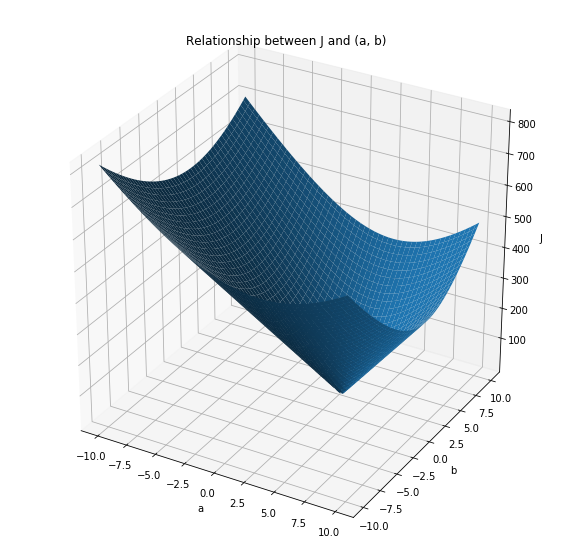

In [3]:
a = np.linspace(-10, 10, 200)
b = np.linspace(-10, 10, 200)
# a, b are the parameter values

X, Y = np.meshgrid(a, b)
J = np.ones(shape = (len(a), len(b)))

# compute J for all pairs of a, b
for i in range(len(a)):
    for j in range(len(b)):
        J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2))

# creating the 3D Plot
fig = plt.figure(figsize=(10, 10))
sub = fig.add_subplot(111, projection='3d')
sub.set_title('Relationship between J and (a, b)')
sub.set_xlabel('a')
sub.set_ylabel('b')
sub.set_zlabel('J')
sub.plot_surface(X, Y, J)
plt.show()

$Computing\ optimal\ learning\ rate\ to\ minimize\ J\ using\ gradient\ descent.$

$\frac{\partial J}{\partial a} = 2y'.\frac{\partial y'}{\partial a} - 2y \frac{\partial y'}{\partial a}$

$ = 2(y' - y)\frac{\partial y'}{\partial a}$

$Similarly,\ \frac{\partial J}{\partial b} = 2(y' - y)\frac{\partial y'}{\partial b}$

$Now,\ \frac{\partial y'}{\partial a} = x_1,$
$\ \frac{\partial y'}{\partial b} = x_2$

$Therefore:$

$\frac{\partial J}{\partial a} = 2(ax_1 + bx_2 - y).x_1 = 2ax_1.x_1 + 2bx_1.x_2 - 2y.x_1$

$\frac{\partial J}{\partial b} = 2(ax_1 + bx_2 - y).x_2 = 2ax_1.x_2 + 2bx_2.x_2 - 2y.x_2$

$Computing\ Hessian\ Matrix\ H(a, b):$

- $\frac{\partial^2 J}{\partial a^2} = 2x_1.x_1$

- $\frac{\partial^2 J}{{\partial a}.{\partial b}} = 2x_1.x_2$

- $\frac{\partial^2 J}{{\partial b}.{\partial a}} = 2x_1.x_2$

- $\frac{\partial^2 J}{\partial b^2} = 2x_2.x_2$

$H(a, b) = H = \begin{pmatrix} 2x_1.x_1 & 2x_1.x_2 \\ 2x_1.x_2 & 2x_2.x_2 \end{pmatrix}$

$\nabla J =\bigg [\frac{\partial J}{\partial a}\quad \frac{\partial J}{\partial b}\bigg ]$

$Now,\ Optimal\ Learning\ Rate\ \ \eta_{opt} = \frac{||\nabla J||^2}{\nabla J^T\ H\ \nabla J}$

$We\ make\ an\ approximation,\ \eta_{opt} = \frac{1}{max(eigenvalue(H)}$

$where\ eigenvalue(H)\ is\ the\ set\ of\ eigenvalues\ of\ H$

In [4]:
# calculating the optimal learning rate:

Hessian = 2 * np.asarray([[np.dot(x_1, x_1), np.dot(x_1, x_2)], [np.dot(x_1, x_2), np.dot(x_2, x_2)]])
eigvals, _ = np.linalg.eig(Hessian)
eta_opt = 1 / max(eigvals)
print("Optimal Learning Rate:", str(eta_opt))

Optimal Learning Rate: 0.00023097718981627107


In [0]:
def loss(a, b):
    return np.linalg.norm((a * x_1 + b * x_2) - y)

def gradient_descent(eta_multiplier):
    global Hessian
    a = b = 0
    errors = [loss(a, b)]
    seq = [(0, 0)]
    MAX_ITER = 100
    iteration = 0

    while errors[-1] >= 1e-3 and iteration < MAX_ITER:
        # using the correct version of optimal learning rate
        del_J_del_a = 2 * a * np.dot(x_1, x_1) + 2 * b * np.dot(x_1, x_2) - 2 * np.dot(y, x_1)
        del_J_del_b = 2 * a * np.dot(x_1, x_2) + 2 * b * np.dot(x_2, x_2) - 2 * np.dot(y, x_2)
        del_J = np.asarray([del_J_del_a, del_J_del_b])
        if np.matmul(np.matmul(del_J.T, Hessian), del_J) == 0:
            # indicates optimum has been reached
            break
            
        eta_opt = np.dot(del_J, del_J) / np.matmul(np.matmul(del_J.T, Hessian), del_J)
        
        eta = eta_opt * eta_multiplier

        # update step
        a = a - eta * del_J_del_a
        b = b - eta * del_J_del_b
        seq.append((a, b))
        errors.append(loss(a, b))
        iteration += 1
    
    return errors, seq, a, b

In [0]:
def make_plot(seq, errors):
    fig = plt.figure(figsize=(10, 20))
    p = fig.add_subplot(211)
    q = fig.add_subplot(212)

    p.set_title('Error v/s Epoch')
    p.set_xlabel('Epoch Number')
    p.set_ylabel('Error')
    p.plot(list(range(1, len(errors))), errors[1:])

    eps = 0.05

    a_min = min([s[0] for s in seq])
    a_max = max([s[0] for s in seq])

    b_min = min([s[1] for s in seq])
    b_max = max([s[1] for s in seq])

    a = np.linspace(a_min - eps, a_max + eps, 500)
    b = np.linspace(b_min - eps, b_max + eps, 500)
    # a, b are the parameter values

    X, Y = np.meshgrid(a, b)
    J = np.ones(shape = (len(a), len(b)))

    # compute J for all pairs of a, b
    for i in range(len(a)):
        for j in range(len(b)):
            J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2))
    
    q.set_title('Convergence Path')
    q.set_xlabel('a')
    q.set_ylabel('b')
    q.contour(X, Y, J)

    # plotting the arrow-ed path
    aspace = 0.1 # good value for scale of 1

    # r is the distance spanned between pairs of points
    r = [0]
    for i in range(1,len(seq)):
        dx = seq[i][0]-seq[i-1][0]
        dy = seq[i][1]-seq[i-1][1]
        r.append(np.sqrt(dx ** 2 + dy ** 2))
    r = np.array(r)

    # rtot is a cumulative sum of r
    rtot = []
    for i in range(len(r)):
        rtot.append(r[0: i].sum())
    rtot.append(r.sum())

    arrowData = [] # holds tuples of x, y, theta for each arrow
    arrowPos = 0 # current point on walk along data
    rcount = 1

    while arrowPos < r.sum():
        x1,x2 = seq[rcount-1][0], seq[rcount][0]
        y1,y2 = seq[rcount-1][1], seq[rcount][1]
        da = arrowPos-rtot[rcount] 
        theta = np.arctan2((x2 - x1), (y2 - y1))
        ax = np.sin(theta) * da + x1
        ay = np.cos(theta) * da + y1

        arrowData.append((ax, ay, theta))
        arrowPos += aspace

        while arrowPos > rtot[rcount + 1]: 
            rcount += 1
            if arrowPos > rtot[-1]:
                break

    for ax,ay,theta in arrowData:
        q.arrow(ax, ay, np.sin(theta) * aspace / 10, np.cos(theta) * aspace / 10, head_width = aspace / 2.5 , head_length = aspace / 1.5 , color = 'red')

    q.plot([s[0] for s in seq], [s[1] for s in seq], color = 'maroon')
    
    plt.show()

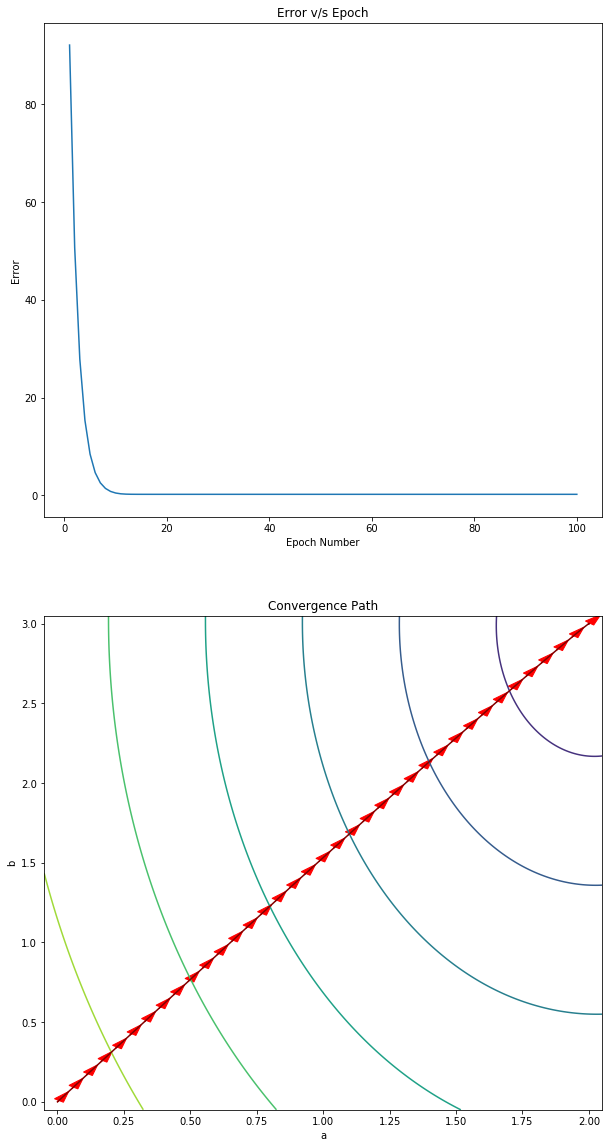

Optimal Values for: 
a : 2.0000892617705355
b : 2.99980779632702


In [7]:
# eta = (0.9 / 2) * eta_opt
e, s, a_opt, b_opt = gradient_descent((0.9 / 2))
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

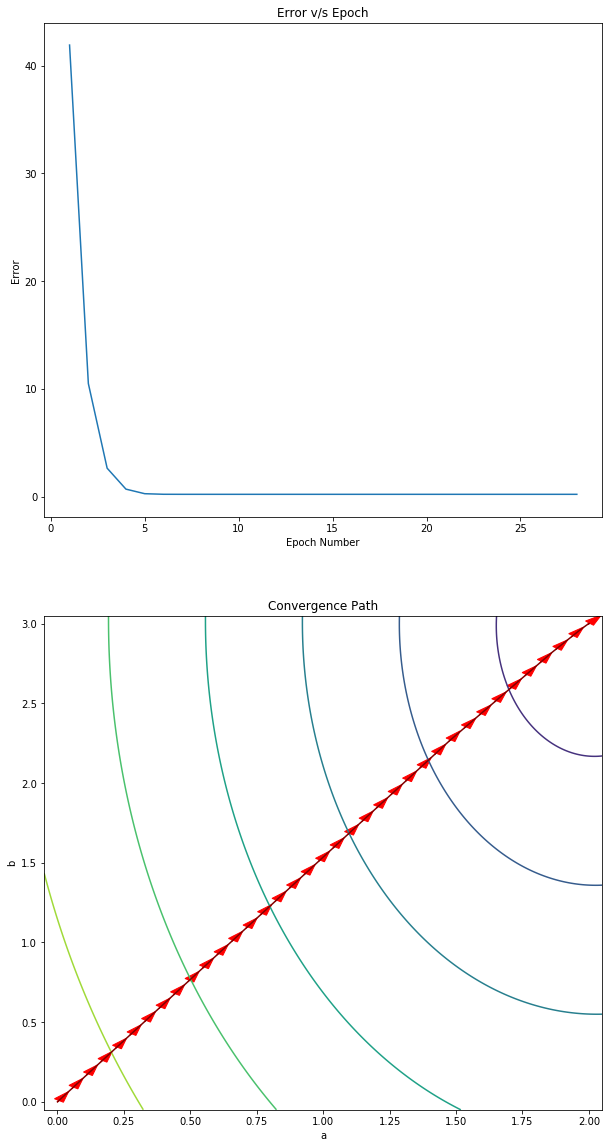

Optimal Values for: 
a : 2.000089261770536
b : 2.9998077963270204


In [8]:
# eta = (1.5 / 2) * eta_opt
e, s, a_opt, b_opt = gradient_descent((1.5 / 2))
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

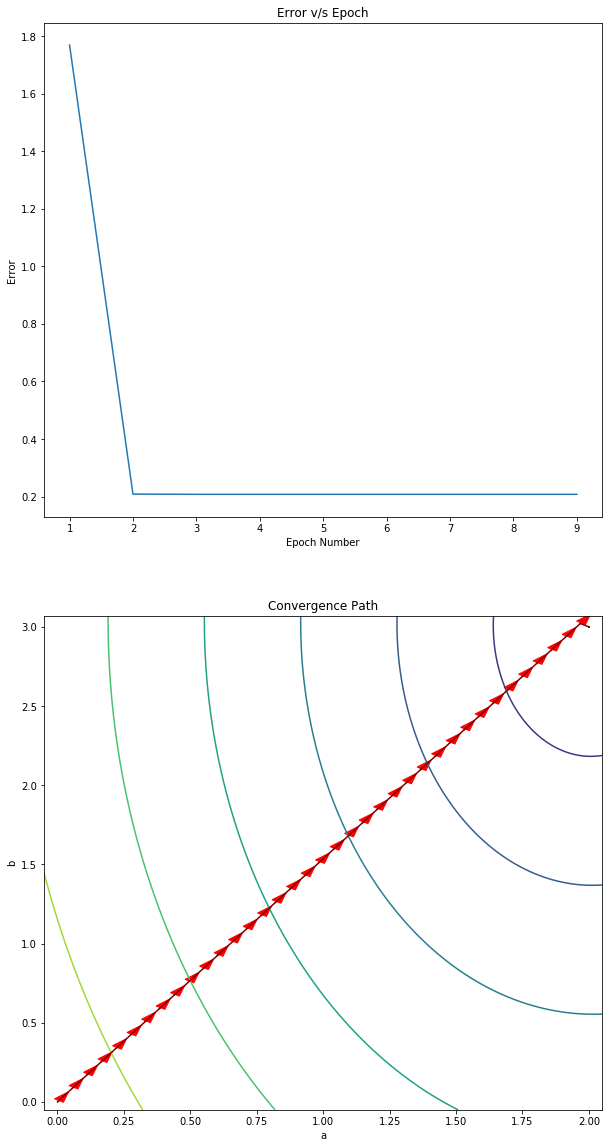

Optimal Values for: 
a : 2.000089261770536
b : 2.9998077963270204


In [9]:
# eta = eta_opt
e, s, a_opt, b_opt = gradient_descent(1)
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

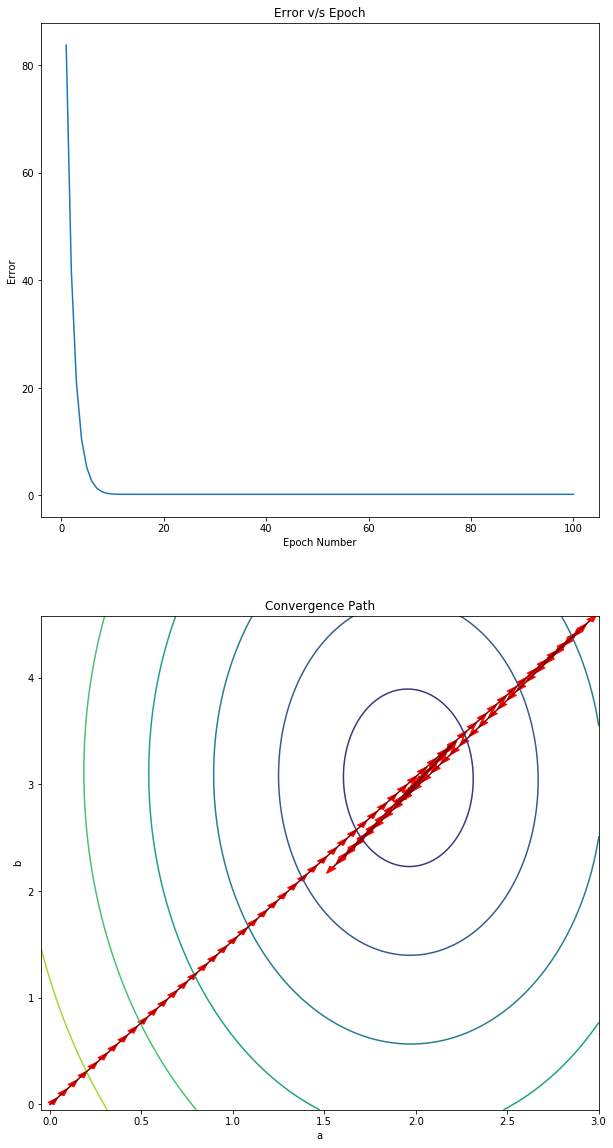

Optimal Values for: 
a : 2.000089261770535
b : 2.9998077963270195


In [10]:
# eta = (1.5) * eta_opt
e, s, a_opt, b_opt = gradient_descent(1.5)
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

# *Thank You*